## Random Forest feature importance 

Author : Ines Krissaane 

In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Import data and pre-processing (cf 1.Pre-processing.ipynb)

In [26]:
X_tr = pd.read_csv('sepsis_data_all.csv')
X_tr.shape

(1552210, 44)

In [27]:
# Remove variables with more than 82% of na.
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' ,'Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Unnamed: 0','Fibrinogen', 'Platelets',
    "Glucose", 'Unit1', "Unit2", "HospAdmTime",'X', 'ID', 'DBP', 'SBP'], axis = 1, inplace = True)

In [28]:
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

In [29]:
X_tr.head()

,HR,O2Sat,Temp,MAP,Resp,Age,Gender,ICULOS,SepsisLabel
0,97.0,95.0,36.11,75.33,19.0,83.14,0,1,0
1,97.0,95.0,36.11,75.33,19.0,83.14,0,2,0
2,89.0,99.0,36.11,86.00,22.0,83.14,0,3,0
3,90.0,95.0,36.11,91.33,30.0,83.14,0,4,0
4,103.0,88.5,36.11,91.33,24.5,83.14,0,5,0


## Random Forest classifier

In [30]:
Y_tr = X_tr.SepsisLabel
X_tr.drop(['SepsisLabel'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X_tr,Y_tr,test_size=.3, random_state=40)

In [31]:
#train the random forest classifier 
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [32]:
# Get numerical feature importances
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.21
Variable: ICULOS               Importance: 0.17
Variable: Temp                 Importance: 0.15
Variable: MAP                  Importance: 0.14
Variable: HR                   Importance: 0.13
Variable: Resp                 Importance: 0.1
Variable: O2Sat                Importance: 0.08
Variable: Gender               Importance: 0.02


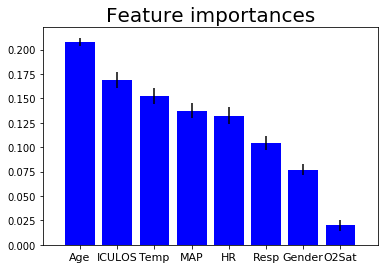

In [41]:
# Plot the feature importances of the forest
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances", size = 20)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ['Age','ICULOS', 'Temp', 'MAP','HR', 'Resp', 'Gender', 'O2Sat'], size = 11)
plt.xlim([-1, X_train.shape[1]])

plt.savefig('featuresRF.png')
plt.show()


The variable O2Sat will not be used in the following because not important as seen above but also might be biased. 

## Interpret results

**Age**

In [34]:
X_tr = pd.read_csv('sepsis_data_all.csv')

In [35]:
sum(X_tr[X_tr.Age < 20].SepsisLabel)/ sum(X_tr.SepsisLabel )

0.004119501361226537

The variable Age is correlated to the label sepsis with more than 75% having sepsis and being more than 50 years old.

**Gender**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916365/
    
Female gender has been demonstrated to be protective under such conditions, whereas male gender may be deleterious due to a diminished cell-mediated immune response and cardiovascular functions. 


Gender Female (0) or Male (1) 

**HR** Heart rate (beats per minute)

The normal resting heart rate for adults over the age of 10 years, including older adults, is between 60 and 100 beats per minute (bpm).

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


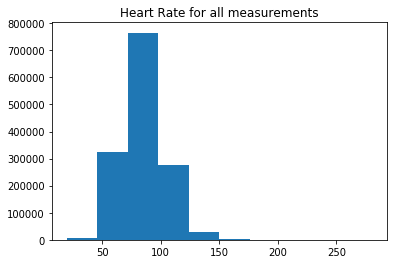

In [36]:
plt.hist(X_tr.HR );
plt.title('Heart Rate for all measurements');

**O2Sat**  Pulse oximetry (%)

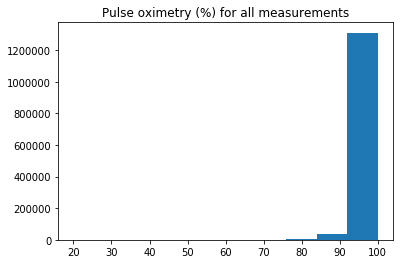

In [37]:
plt.hist(X_tr.O2Sat);
plt.title('Pulse oximetry (%) for all measurements');

Normal pulse oximeter readings usually range from 95 to 100 percent.Seems not interesting for our analysis.

**MAP** Mean arterial pressure (mm Hg)

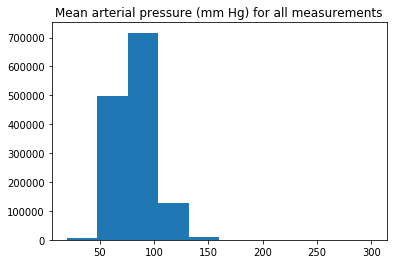

In [38]:
plt.hist(X_tr.MAP );
plt.title('Mean arterial pressure (mm Hg) for all measurements');

 It is vital to have a MAP of at least 60 mmHg to provide enough blood to the coronary arteries, kidneys, and brain. The normal MAP range is between 70 and 100 mmHg.
 A MAP ≥ 65 mmHg is recommended in patients with severe sepsis.